This part is diving into the novel approach to approximate Bessel functions, abundent in cosmology as well as in other areas, through symbolic regression search

In [63]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import sympy as sp
import numpy as np
from scipy import special
import sympy

params = {
    'figure.figsize': (8.5, 6.5),
    'font.style': 'normal',
    'axes.labelsize': 25,
    'font.size': 16,
    'legend.fontsize': 11,
    'xtick.labelsize': 16,
    'ytick.labelsize': 16,
    'xtick.direction': 'in',
    'ytick.direction': 'in',
    'xtick.major.size': 8,
    'ytick.major.size': 10,
    'xtick.minor.size': 4,
    'ytick.minor.size': 4,
    'xtick.major.width': 1.5,
    'ytick.major.width': 1.5,
    'font.family': 'serif',
    'legend.framealpha': 1,  # Set legend alpha to 1
    'legend.borderpad': 0.2,
    'xtick.minor.visible': True,
    'ytick.minor.visible': True
}
plt.rcParams.update(params)

from BesselML import Problem
from BesselML import Solution
from BesselML import Promising_solution
sympy.init_printing()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


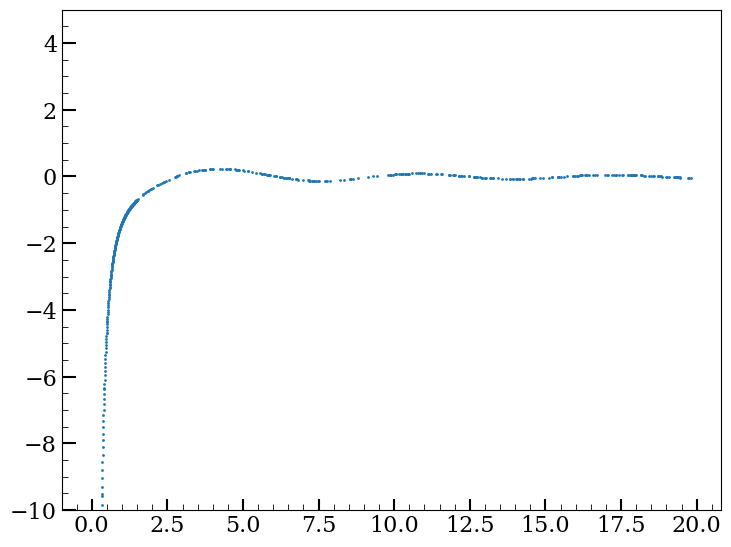

In [95]:
np.random.seed(42) #Keeping the seed for reproducibility


#x_train = np.concatenate(np.sort(np.random.uniform(0, 20, 200)))#, np.linspace(0, 0.5, 500)))
x_train = np.sort(np.concatenate((np.random.uniform(1e-3, 20, 300), np.linspace(1e-3, 1.5, 300))))
# Training data from uniform distribution
x_test = np.sort(np.concatenate((np.random.uniform(1e-3, 20, 300), np.linspace(1e-3, 1.5, 300))))

target_train = special.spherical_yn(1, x_train, derivative=False) 
target_test = special.spherical_yn(1, x_test, derivative=False)

plt.scatter(x_train, target_train, s=1)
plt.ylim(-10, 5)


In [137]:
bessel_sph_0_args = {
    'allowed_symbols': "add,sub,mul,div,constant,variable,sin,cos",
    'epsilon': 1e-5,
    'objectives': ['rmse', 'length'], 
    'max_evaluations': int(1e16),
    'generations': int(1e16),
    'max_length': 50,
    'max_time': 60*3,
    'n_threads': 12,
    'tournament_size':2
}

Bessel_sph_0 = Problem("Bessel spherical of order 0", (x_train, target_train), (x_test, target_test), bessel_sph_0_args)

In [140]:
Bessel_sph_0.solve()

[40776.9609375, 5.0], 498828115968.00, ((-3048.165771484375) + (77.486236572266 * (3.141592741013 * X1))), 1662760487.65
[40705.84765625, 6.0], 497089773568.00, ((-2279.708984375000) + ((-4080.885253906250) * cos(((-3.336327552795) * X1)))), 1656966475.17
[7706.31005859375, 7.0], 17816162304.00, (1928.152709960938 + ((-68.087043762207) * (2.718281745911 / (0.192470103502 * X1)))), 59387213.15
[3.103700876235962, 8.0], 3529.97, ((-143385824.000000000000) + (143385824.000000000000 * cos(((-0.001390433405) / (11.766157150269 * X1))))), 9.63
[0.24144954979419708, 9.0], 643.90, ((-0.206906616688) + (0.365315914154 * (((-1.414191603661) / (0.718767285347 * X1)) / (0.718767285347 * X1)))), 0.06
[0.07191722095012665, 11.0], 624.80, (0.059300385416 + ((-0.778005063534) * ((cos(cos(((-0.837237119675) * X1))) / (0.718767285347 * X1)) / (0.584831595421 * X1)))), 0.01
[0.046774063259363174, 12.0], 638.44, (0.046751260757 + (0.940467238426 * ((((-1.024934649467) / (0.512933135033 * X1)) + sin(((-1.0

<Axes: title={'center': 'Bessel spherical of order 0 - Length vs MSE (Pareto Front)'}, xlabel='Length', ylabel='MSE'>

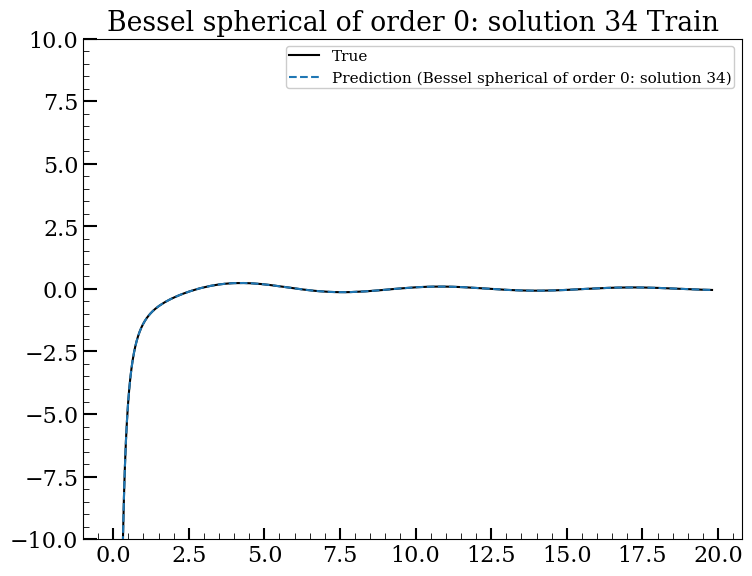

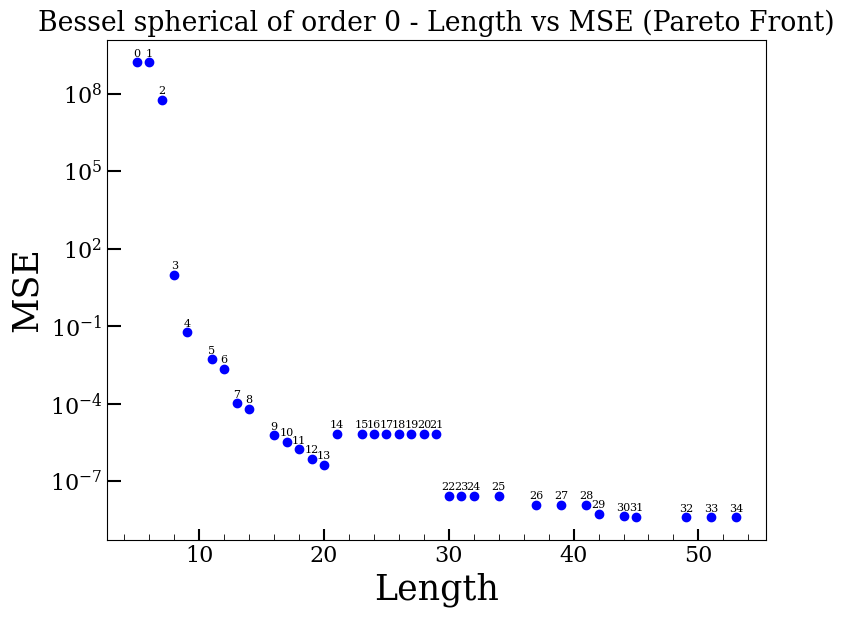

In [141]:
Bessel_sph_0.solutions[-1].plot_results()
plt.ylim(-10, 10)
Bessel_sph_0.plot_l_vs_mse()

In [157]:
Neumann_sph_1 = Bessel_sph_0

k=7
Neumann_sph_1.solutions[k].display_expression()
b_vals = Neumann_sph_1.solutions[k].extract_and_format()[1]
b_vals

<IPython.core.display.Math object>

{'b0': 0.0020256775899998303,
 'b1': 0.757717578753045,
 'b2': 1.022796869277954,
 'b3': 1.0000001168734798,
 'b4': 0.7429116368290352}

In [160]:
str(Neumann_sph_1.solutions[k].sympy_expr)

'b0 - b1*sin(X1*b2)/X1 - b3*cos(X1*b4)/X1**2'

In [194]:
manual = '- b1*sin(X1*b2)/X1 - b3*cos(X1*b4)/X1**2'

Manual_limiting_test = Promising_solution(sp.parsing.sympy_parser.parse_expr(manual),  (x_train, target_train), Neumann_sph_1.solutions[k], initial_parameters=Neumann_sph_1.solutions[k].b_vals)
#constraints_man, const_term_man, linear_term_man = Manual_limiting_test.generate_constraints_from_expansion(const_target = 0, linear_target=0)

In [195]:
Final_solution = Manual_limiting_test.int_analysis_and_modification_iterative_optimisation()

  - Found active parameters in expression: ['b1', 'b2', 'b3', 'b4']
  - Baseline Best MSE: 8.669008e+05

--- Starting Iterative Refinement Process ---

  - Cheapest candidate to round is 'b2'.
    - If rounded, new MSE would be 4.361491e-09 (Abs change: -8.669008e+05, Rel cost: 0.00%)
    - Cost is acceptable. Locking in 'b2' as an integer.

  - Cheapest candidate to round is 'b4'.
    - If rounded, new MSE would be 3.903051e-13 (Abs change: -4.361101e-09, Rel cost: 0.00%)
    - Cost is acceptable. Locking in 'b4' as an integer.

  - Cheapest candidate to round is 'b3'.
    - If rounded, new MSE would be 5.687277e-16 (Abs change: -3.897364e-13, Rel cost: 0.00%)
    - Cost is acceptable. Locking in 'b3' as an integer.

  - Cheapest candidate to round is 'b1'.
    - If rounded, new MSE would be 2.226206e-26 (Abs change: -5.687277e-16, Rel cost: 0.00%)
    - Cost is acceptable. Locking in 'b1' as an integer.

  - All parameters have been rounded.

  - Final parameters to be rounded: ['b2'

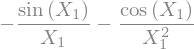

In [196]:
Final_solution.sympy_expr